In [1]:
# Tumors dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config Completer.use_jedi = False        # For autocomplete to work!

In [2]:
df = pd.read_csv('data/cancer_classification.csv')

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Basic EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


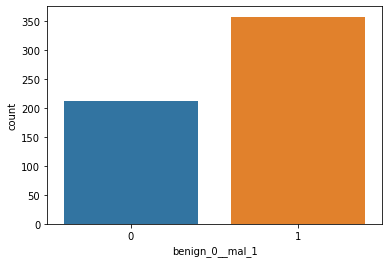

In [7]:
sns.countplot(data=df, x='benign_0__mal_1');

In [11]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

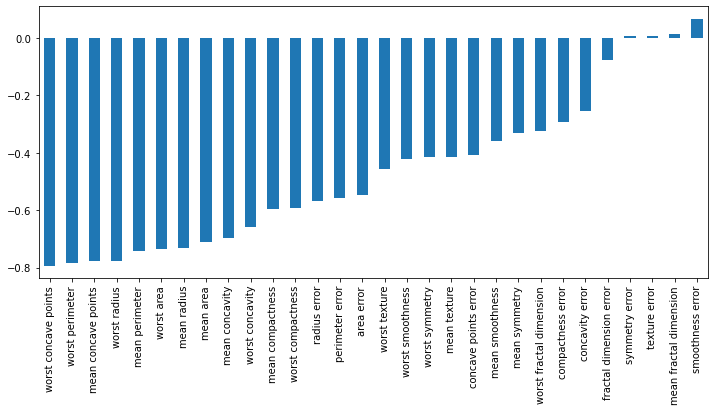

In [15]:
plt.figure(figsize=(12,5))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar');

<AxesSubplot:>

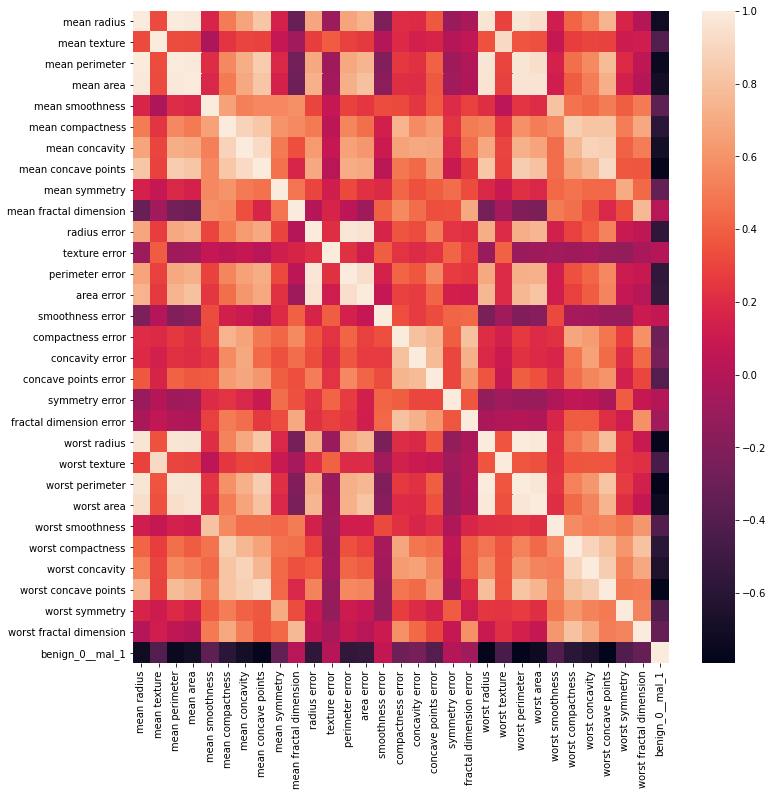

In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr());

# Train test split

In [17]:
X = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# Scaling

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
X_train = scaler.fit_transform(X_train)

In [23]:
X_test = scaler.transform(X_test)

# Creating the model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [25]:
X_train.shape

(426, 30)

In [26]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

# BINARY CLASSIFICATION -> USE SIGMOID
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [29]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 0s 16ms/step - loss: 0.6803 - val_loss: 0.6607
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6400 - val_loss: 0.6277
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6052 - val_loss: 0.5945
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5700 - val_loss: 0.5571
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5317 - val_loss: 0.5175
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4928 - val_loss: 0.4740
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4498 - val_loss: 0.4289
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4094 - val_loss: 0.3836
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3708 - val_loss: 0.3454
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3366 - val_loss: 0.3123
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.0539 - val_loss: 0.1184
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0552 - val_loss: 0.1153
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0527 - val_loss: 0.1145
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0539 - val_loss: 0.1149
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0520 - val_loss: 0.1128
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0513 - val_loss: 0.1174
Epoch 89/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0515 - val_loss: 0.1141
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0506 - val_loss: 0.1104
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0524 - val_loss: 0.1137
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0498 - val_loss: 0.1126
Epoch 93/600


14/14 [==============================] - 0s 4ms/step - loss: 0.0348 - val_loss: 0.1159
Epoch 246/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0318 - val_loss: 0.1278
Epoch 247/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0329 - val_loss: 0.1155
Epoch 248/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0337 - val_loss: 0.1307
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0329 - val_loss: 0.1179
Epoch 250/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0331 - val_loss: 0.1208
Epoch 251/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0340 - val_loss: 0.1222
Epoch 252/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0422 - val_loss: 0.1180
Epoch 253/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0331 - val_loss: 0.1179
Epoch 254/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0315 - val_loss: 0.1261
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0228 - val_loss: 0.1511
Epoch 408/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0225 - val_loss: 0.1475
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0267 - val_loss: 0.1446
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0206 - val_loss: 0.1577
Epoch 411/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0239 - val_loss: 0.1509
Epoch 412/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0205 - val_loss: 0.1492
Epoch 413/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0208 - val_loss: 0.1530
Epoch 414/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0211 - val_loss: 0.1474
Epoch 415/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0232 - val_loss: 0.1650
Epoch 416/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0202 - val_loss: 0.1475
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0128 - val_loss: 0.2224
Epoch 570/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0122 - val_loss: 0.2253
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0115 - val_loss: 0.2267
Epoch 572/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0115 - val_loss: 0.2247
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0117 - val_loss: 0.2319
Epoch 574/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0112 - val_loss: 0.2363
Epoch 575/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0122 - val_loss: 0.2316
Epoch 576/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0127 - val_loss: 0.2295
Epoch 577/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0120 - val_loss: 0.2415
Epoch 578/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0116 - val_loss: 0.2279
Epoc

In [30]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

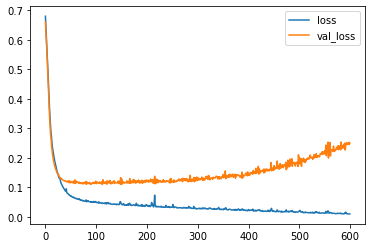

In [31]:
losses.plot()

### Awesome example of overfitting: val_loss starts to increase after too many epochs.

## Solution 1:
We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [32]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

# BINARY CLASSIFICATION -> USE SIGMOID
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Arguments:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantit

In [35]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [36]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 16ms/step - loss: 0.6718 - val_loss: 0.6563
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6435 - val_loss: 0.6277
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6113 - val_loss: 0.5901
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5718 - val_loss: 0.5463
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5268 - val_loss: 0.4981
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4801 - val_loss: 0.4511
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4346 - val_loss: 0.4023
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3892 - val_loss: 0.3602
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3505 - val_loss: 0.3220
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3173 - val_loss: 0.2879
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.0552 - val_loss: 0.1158
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0543 - val_loss: 0.1156
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0541 - val_loss: 0.1177
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0535 - val_loss: 0.1178
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0529 - val_loss: 0.1131
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0542 - val_loss: 0.1174
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0545 - val_loss: 0.1129
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0560 - val_loss: 0.1175
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0583 - val_loss: 0.1133
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0515 - val_loss: 0.1214
Epoch 93/600


In [37]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

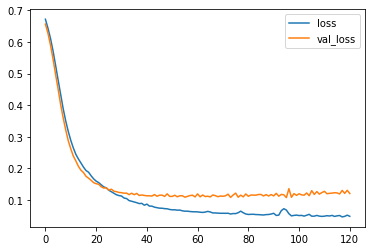

In [38]:
model_loss.plot()

## Solution 2: Dropout layers + early stoping

In [39]:
from tensorflow.keras.layers import Dropout

In [40]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5)) #Turn off half neurons randomly

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5)) #Turn off half neurons randomly

# BINARY CLASSIFICATION -> USE SIGMOID
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [41]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 18ms/step - loss: 0.6949 - val_loss: 0.6936
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6913 - val_loss: 0.6838
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6820 - val_loss: 0.6729
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6667 - val_loss: 0.6580
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6504 - val_loss: 0.6339
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6278 - val_loss: 0.6087
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6132 - val_loss: 0.5836
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6018 - val_loss: 0.5575
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5544 - val_loss: 0.5258
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5430 - val_loss: 0.4972
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.1442 - val_loss: 0.1205
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1177 - val_loss: 0.1175
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1240 - val_loss: 0.1271
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1203 - val_loss: 0.1193
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1180 - val_loss: 0.1166
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1231 - val_loss: 0.1174
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1111 - val_loss: 0.1248
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1163 - val_loss: 0.1180
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1397 - val_loss: 0.1158
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1147 - val_loss: 0.1159
Epoch 93/600


In [42]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

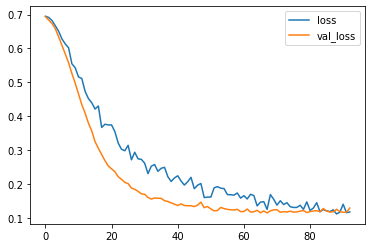

In [43]:
model_loss.plot()

# Model evaluation

In [44]:
model.predict_classes(X_test) # DEPRECATED

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [47]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        55
           1       0.98      0.95      0.97        88

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [51]:
print(confusion_matrix(y_test, predictions))

[[53  2]
 [ 4 84]]


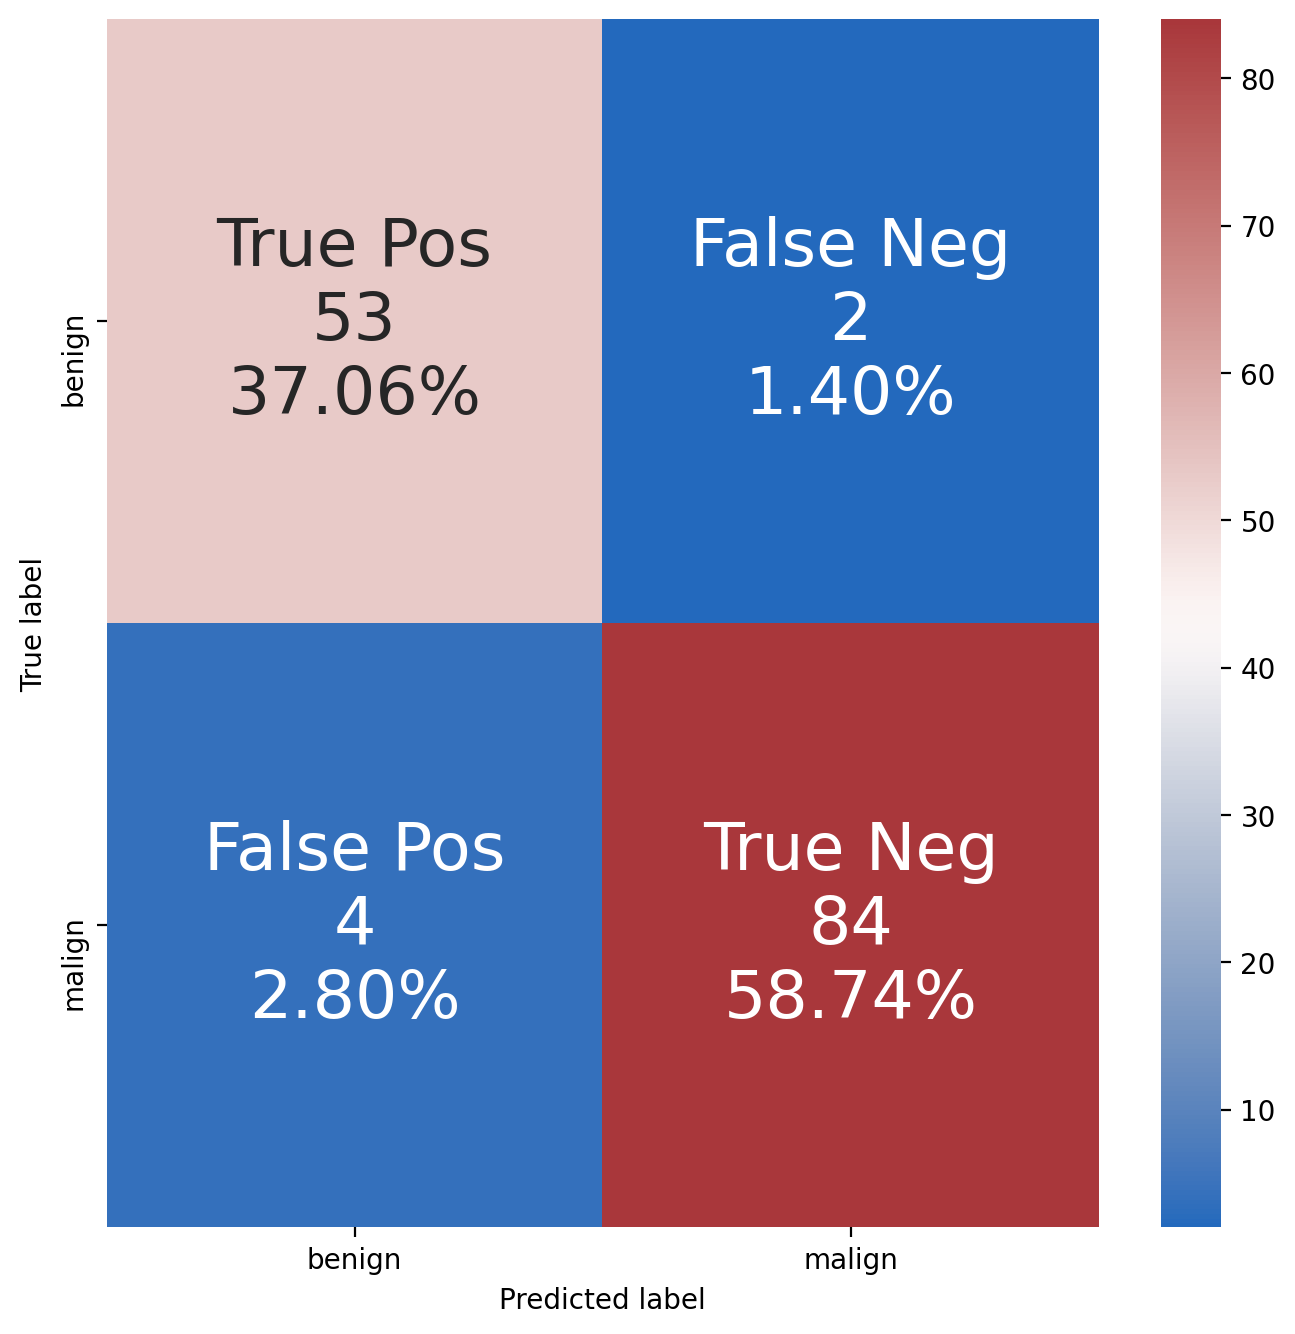

In [55]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True Pos','False Neg','False Pos','True Neg']
categories = ['benign','malign']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

fig_cf = plt.figure(figsize=(8,8), dpi = 200)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='',
                 cmap = 'vlag', xticklabels=categories, yticklabels=categories,
                 annot_kws={"fontsize":24})
ax.set(xlabel="Predicted label")
ax.set(ylabel="True label")
plt.show()